## **Analisis del Dataset del Titanic**

En este Jupyter Notebook se extraerán y analizarán los datos contenidos en el dataset del archivo csv de _Titanic_, mostrando las conclusiones y hallazgos obtenidos durante el proceso de forma gráfica y legible.

In [1]:
# Importamos las librerías que vamos a utilizar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("titanic_raw.csv") #Importamos el archivo csv

In [3]:
df.head(5) # Extraemos las 5 primeras filas del dataset para explorarlo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.set_index("PassengerId", inplace=True) # Establezco el PassengerId como index ya que es un identificador único
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df.columns # Obtengo el nombre de las columnas (al hacerlo un índice, no aparece PassengerId)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.isnull().any() # Ver si hay y en caso de haber, qué columnas tinen valores nulos

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Vemos que las columnas Age, Cabin y Embarked contienen valores nulos.

In [8]:
cantidad_total_personas = df.Sex.count()
cantidad_total_hombres = df.Sex.loc[df.Sex == 'male'].count()
cantidad_total_mujeres = df.Sex.loc[df.Sex == 'female'].count()

print(f"{cantidad_total_personas = }", "\n")

print(f"Número de personas divididas por género: \n{df.Sex.value_counts()}", "\n")

print(f"El {round(cantidad_total_hombres / cantidad_total_personas * 100, 2)}% eran Hombres y el {round(cantidad_total_mujeres / cantidad_total_personas * 100, 2)}% eran Mujeres")

cantidad_total_personas = 891 

Número de personas divididas por género: 
Sex
male      577
female    314
Name: count, dtype: int64 

El 64.76% eran Hombres y el 35.24% eran Mujeres


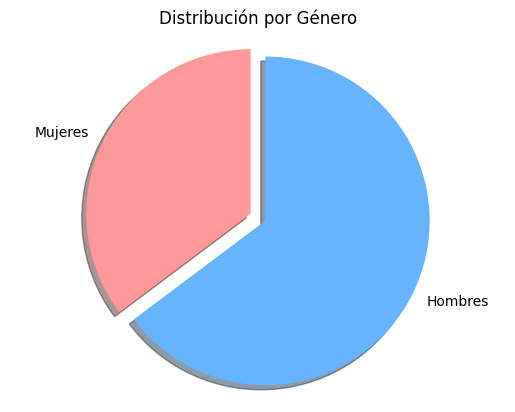

In [55]:
plt.pie([cantidad_total_mujeres, cantidad_total_hombres],
        labels=["Mujeres", "Hombres"],
        colors=["#ff9999","#66b3ff"],
        startangle=90,
        shadow=True,
        explode=(0.1, 0))

plt.title("Distribución por Género")
plt.axis('equal')
plt.show()

In [10]:
df.Survived.value_counts()

personas_murieron = df.Survived.value_counts()[0]
personas_sobrevivieron = df.Survived.value_counts()[1]

print(f"De {df.Survived.count()} personas, murieron {personas_murieron} personas y sobrevivieron {personas_sobrevivieron} personas.")

De 891 personas, murieron 549 personas y sobrevivieron 342 personas.


In [11]:
mujeres_sobrevivieron = df.Survived.loc[(df.Sex == 'female') & (df.Survived == 1)].count()
mujeres_murieron = df.Survived.loc[(df.Sex == 'female') & (df.Survived == 0)].count()
hombres_sobrevivieron = df.Survived.loc[(df.Sex == 'male') & (df.Survived == 1)].count()
hombres_murieron = df.Survived.loc[(df.Sex == 'male') & (df.Survived == 0)].count()

print(f"Sobrevivieron {mujeres_sobrevivieron} mujeres.") # Nº de mujeres que sobrevivieron
print(f"Murieron {mujeres_murieron} mujeres.") # Nº de mujeres que murieron
print()
print(f"Sobrevivieron {hombres_sobrevivieron} hombres.") # Nº de hombres que sobrevivieron
print(f"Murieron {hombres_murieron} hombres.") # Nº de hombres que murieron
print()
print(f"El {round((hombres_sobrevivieron + mujeres_sobrevivieron) / cantidad_total_personas * 100, 2)}% de las personas sobrevivieron.")
print()
print(f"El {round(mujeres_sobrevivieron / df.Survived.loc[df.Survived == 1].count() * 100, 2)}% de los que sobrevivieron eran mujeres.")
print(f"El {round(hombres_murieron / df.Survived.loc[df.Survived == 0].count() * 100, 2)}% de los que murieron eran hombres.")

Sobrevivieron 233 mujeres.
Murieron 81 mujeres.

Sobrevivieron 109 hombres.
Murieron 468 hombres.

El 38.38% de las personas sobrevivieron.

El 68.13% de los que sobrevivieron eran mujeres.
El 85.25% de los que murieron eran hombres.


In [12]:
# Considerando adultos a los mayores de 14 años.
total_niños = df.Age.loc[df.Age <= 14].count()

# print(f"El {}% de niños independientemente del género sobrevivieron")

print()

print(f"Habían {total_niños} niños.")
print(f"El {round(total_niños / cantidad_total_personas * 100, 2)}% de todas las personas ({cantidad_total_personas}) eran niños.")

niños_murieron = df.Age.loc[(df.Age <= 14) & (df.Survived == 0) & (df.Sex == 'male')].count()
niños_sobrevivieron = df.Age.loc[(df.Age <= 14) & (df.Survived == 1) & (df.Sex == 'male')].count()
niñas_murieron = df.Age.loc[(df.Age <= 14) & (df.Survived == 0) & (df.Sex == 'female')].count()
niñas_sobrevivieron = df.Age.loc[(df.Age <= 14) & (df.Survived == 1) & (df.Sex == 'female')].count()

print(f"El {round((niños_sobrevivieron + niñas_sobrevivieron) / total_niños * 100, 2)}% de los niñ@s sobrevivieron, teniendo en cuenta que el {round(personas_sobrevivieron / cantidad_total_personas * 100, 2)}% de personas sobrevivieron.")
print()
print(f"El {round(niñas_sobrevivieron / total_niños * 100, 2)}% de los niños que sobrevivieron eran chicas.")
print(f"El {round(niños_sobrevivieron / total_niños * 100, 2)}% de los niños que sobrevivieron eran chicos.")
print()
print(f"El {round(niñas_murieron / total_niños * 100, 2)}% de los niños que muerieron eran chicas.")
print(f"El {round(niños_murieron / total_niños * 100, 2)}% de los niños que muerieron eran chicos.")


Habían 77 niños.
El 8.64% de todas las personas (891) eran niños.
El 58.44% de los niñ@s sobrevivieron, teniendo en cuenta que el 38.38% de personas sobrevivieron.

El 31.17% de los niños que sobrevivieron eran chicas.
El 27.27% de los niños que sobrevivieron eran chicos.

El 18.18% de los niños que muerieron eran chicas.
El 23.38% de los niños que muerieron eran chicos.


In [13]:
total_personas_embarked = df.Embarked.count()

print(df.Embarked.value_counts())

print(f"Hay {len(df) - df.Embarked.count()} de {len(df)} que no sabemos qué clase cogieron.")

print(f"El {round(df.Embarked.value_counts()[0] / total_personas_embarked * 100, 2)}% viajaron en clase S.")
print(f"El {round(df.Embarked.value_counts()[1] / total_personas_embarked * 100, 2)}% viajaron en clase C.")
print(f"El {round(df.Embarked.value_counts()[2] / total_personas_embarked * 100, 2)}% viajaron en clase Q. ")

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Hay 2 de 891 que no sabemos qué clase cogieron.
El 72.44% viajaron en clase S.
El 18.9% viajaron en clase C.
El 8.66% viajaron en clase Q. 


C:\Users\danie\AppData\Local\Temp\ipykernel_11156\3475520502.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"El {round(df.Embarked.value_counts()[0] / total_personas_embarked * 100, 2)}% viajaron en clase S.")
C:\Users\danie\AppData\Local\Temp\ipykernel_11156\3475520502.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"El {round(df.Embarked.value_counts()[1] / total_personas_embarked * 100, 2)}% viajaron en clase C.")
C:\Users\danie\AppData\Local\Temp\ipykernel_11156\3475520502.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys wil